# Импорт библиотек и модулей

In [ ]:
!pip install tensorflow==2.16.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: ml-dtypes
    

In [ ]:
import os  # Работа с операционной системой (файлы, переменные окружения)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Уменьшение уровня логов TensorFlow
import warnings  # Контроль предупреждений
warnings.filterwarnings('ignore')  # Игнорирование предупреждений
import numpy as np  # Математические операции и работа с массивами
import kagglehub  # Доступ к моделям и датасетам Kaggle
import matplotlib.pyplot as plt  # Визуализация данных (графики)
import pandas as pd  # Анализ и обработка табличных данных
import seaborn as sns  # Статистическая визуализация (более красивые графики)
import plotly.graph_objects as go  # Интерактивная визуализация
import re  # Регулярные выражения для работы с текстом
import tensorflow as tf  # Фреймворк для машинного обучения
from tensorflow.keras.applications.inception_v3 import InceptionV3  # Готовая CNN-модель
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # Обработка изображений
from tensorflow.keras.preprocessing.text import Tokenizer  # Токенизация текста
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Выравнивание последовательностей
from tensorflow.keras.utils import to_categorical, plot_model  # Утилиты (one-hot, визуализация модели)
from tensorflow.keras.models import Model, load_model  # Создание и загрузка моделей
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add  # Слои нейросетей
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization  # Дополнительные слои
from tensorflow.keras.optimizers import Adam  # Оптимизатор
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler  # Коллбэки для обучения
from sklearn.model_selection import train_test_split  # Разделение данных на train/test
from nltk.translate.bleu_score import corpus_bleu  # Оценка качества текста (BLEU score)
from PIL import Image  # Работа с изображениями (Pillow)
from tqdm.notebook import tqdm_notebook  # Индикатор выполнения в Jupyter
from collections import Counter  # Подсчет частоты элементов

# Предобработка данных

In [ ]:
adityajn105_flickr8k_path = kagglehub.dataset_download('adityajn105/flickr8k')

print('Data source import complete.')

Data source import complete.


In [ ]:
# Путь к картинкам
images_directory = '/kaggle/input/flickr8k/Images/'
# Путь к меткам
captions_path = '/kaggle/input/flickr8k/captions.txt'

In [ ]:
def load_captions(file_path):
    with open(file_path, 'r') as f:
        captions = f.readlines()
        # Приведение меток к нижнему регистру
        captions = [caption.lower() for caption in captions[1:]]
    return captions

def tokenize_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    return tokenizer

# Загрузка меток из датасета
captions = load_captions(captions_path)
captions[:15:3]

['1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .\n',
 '1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .\n',
 '1001773457_577c3a7d70.jpg,a black dog and a tri-colored dog playing with each other on the road .\n',
 '1001773457_577c3a7d70.jpg,two dogs on pavement moving toward each other .\n',
 '1002674143_1b742ab4b8.jpg,a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .\n']

# Очистка меток

In [ ]:
def clean_text(text):
    # Удаление спец.символов
    text = re.sub(r'[^\w\s]', '', text)

    # Удаление цифр
    text = re.sub(r'\d+', '', text)

    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Очистка меток
cleaned_captions = [clean_text(caption.split(',')[1]) for caption in captions]
cleaned_captions[:15:2]

['a child in a pink dress is climbing up a set of stairs in an entry way',
 'a little girl climbing into a wooden playhouse',
 'a little girl in a pink dress going into a wooden cabin',
 'a black dog and a tricolored dog playing with each other on the road',
 'two dogs of different breeds looking at each other on the road',
 'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
 'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it',
 'young girl with pigtails painting outside in the grass']

In [ ]:
# Image ID + \t + Caption
captions_IDs = []
for i in range(len(cleaned_captions)):
    # 'start' и 'end' к меткам
    item = captions[i].split(',')[0]+'\t'+'start '+cleaned_captions[i]+' end\n'
    captions_IDs.append(item)

captions_IDs[:20:3], len(captions_IDs)

(['1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
  '1000268201_693b08cb0e.jpg\tstart a little girl climbing the stairs to her playhouse end\n',
  '1001773457_577c3a7d70.jpg\tstart a black dog and a tricolored dog playing with each other on the road end\n',
  '1001773457_577c3a7d70.jpg\tstart two dogs on pavement moving toward each other end\n',
  '1002674143_1b742ab4b8.jpg\tstart a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it end\n',
  '1003163366_44323f5815.jpg\tstart a man lays on a bench while his dog sits by him end\n',
  '1003163366_44323f5815.jpg\tstart a shirtless man lies on a park bench with his dog end\n'],
 40455)

# Визуализация изображений

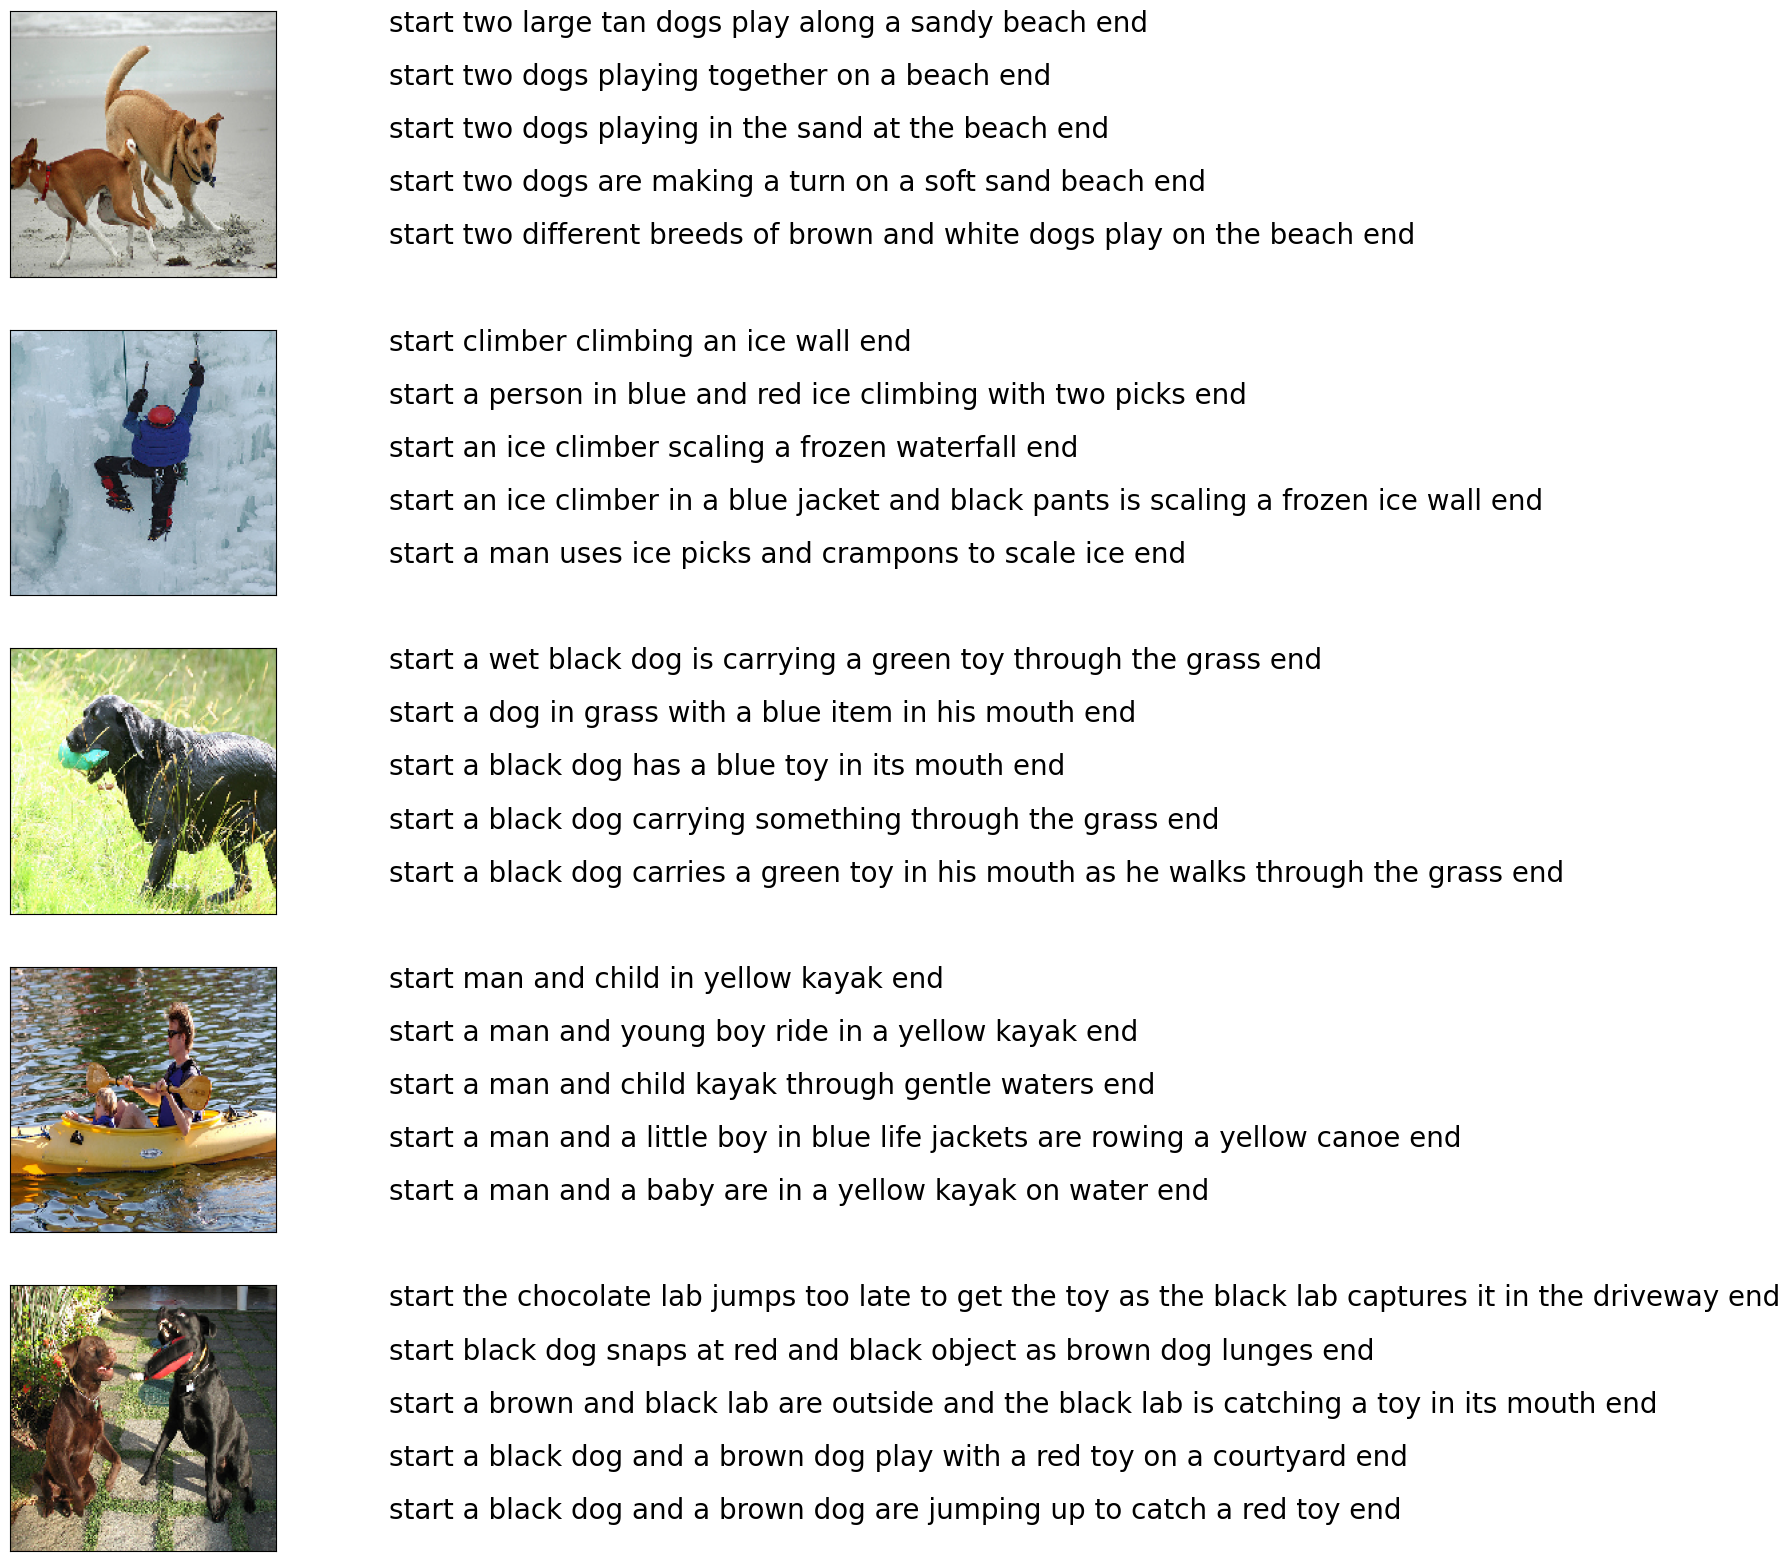

In [ ]:
def visualization(data, num_of_images):
    # Мы используем словари для доступа к подписям каждого изображения по его ID
    captions_dictionary = {}
    for item in data[100:100+(num_of_images)*5]:
        image_id, caption = item.split('\t')
        if image_id not in captions_dictionary:
            captions_dictionary[image_id] = []
        captions_dictionary[image_id].append(caption)
    else:
        list_captions = [x for x in captions_dictionary.items()]

    count = 1
    fig = plt.figure(figsize=(10,20))
    for filename in list(captions_dictionary.keys()):
        captions = captions_dictionary[filename]
        image_load = load_img(images_directory+filename, target_size=(199,199,3))

        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()

visualization(captions_IDs, 5)

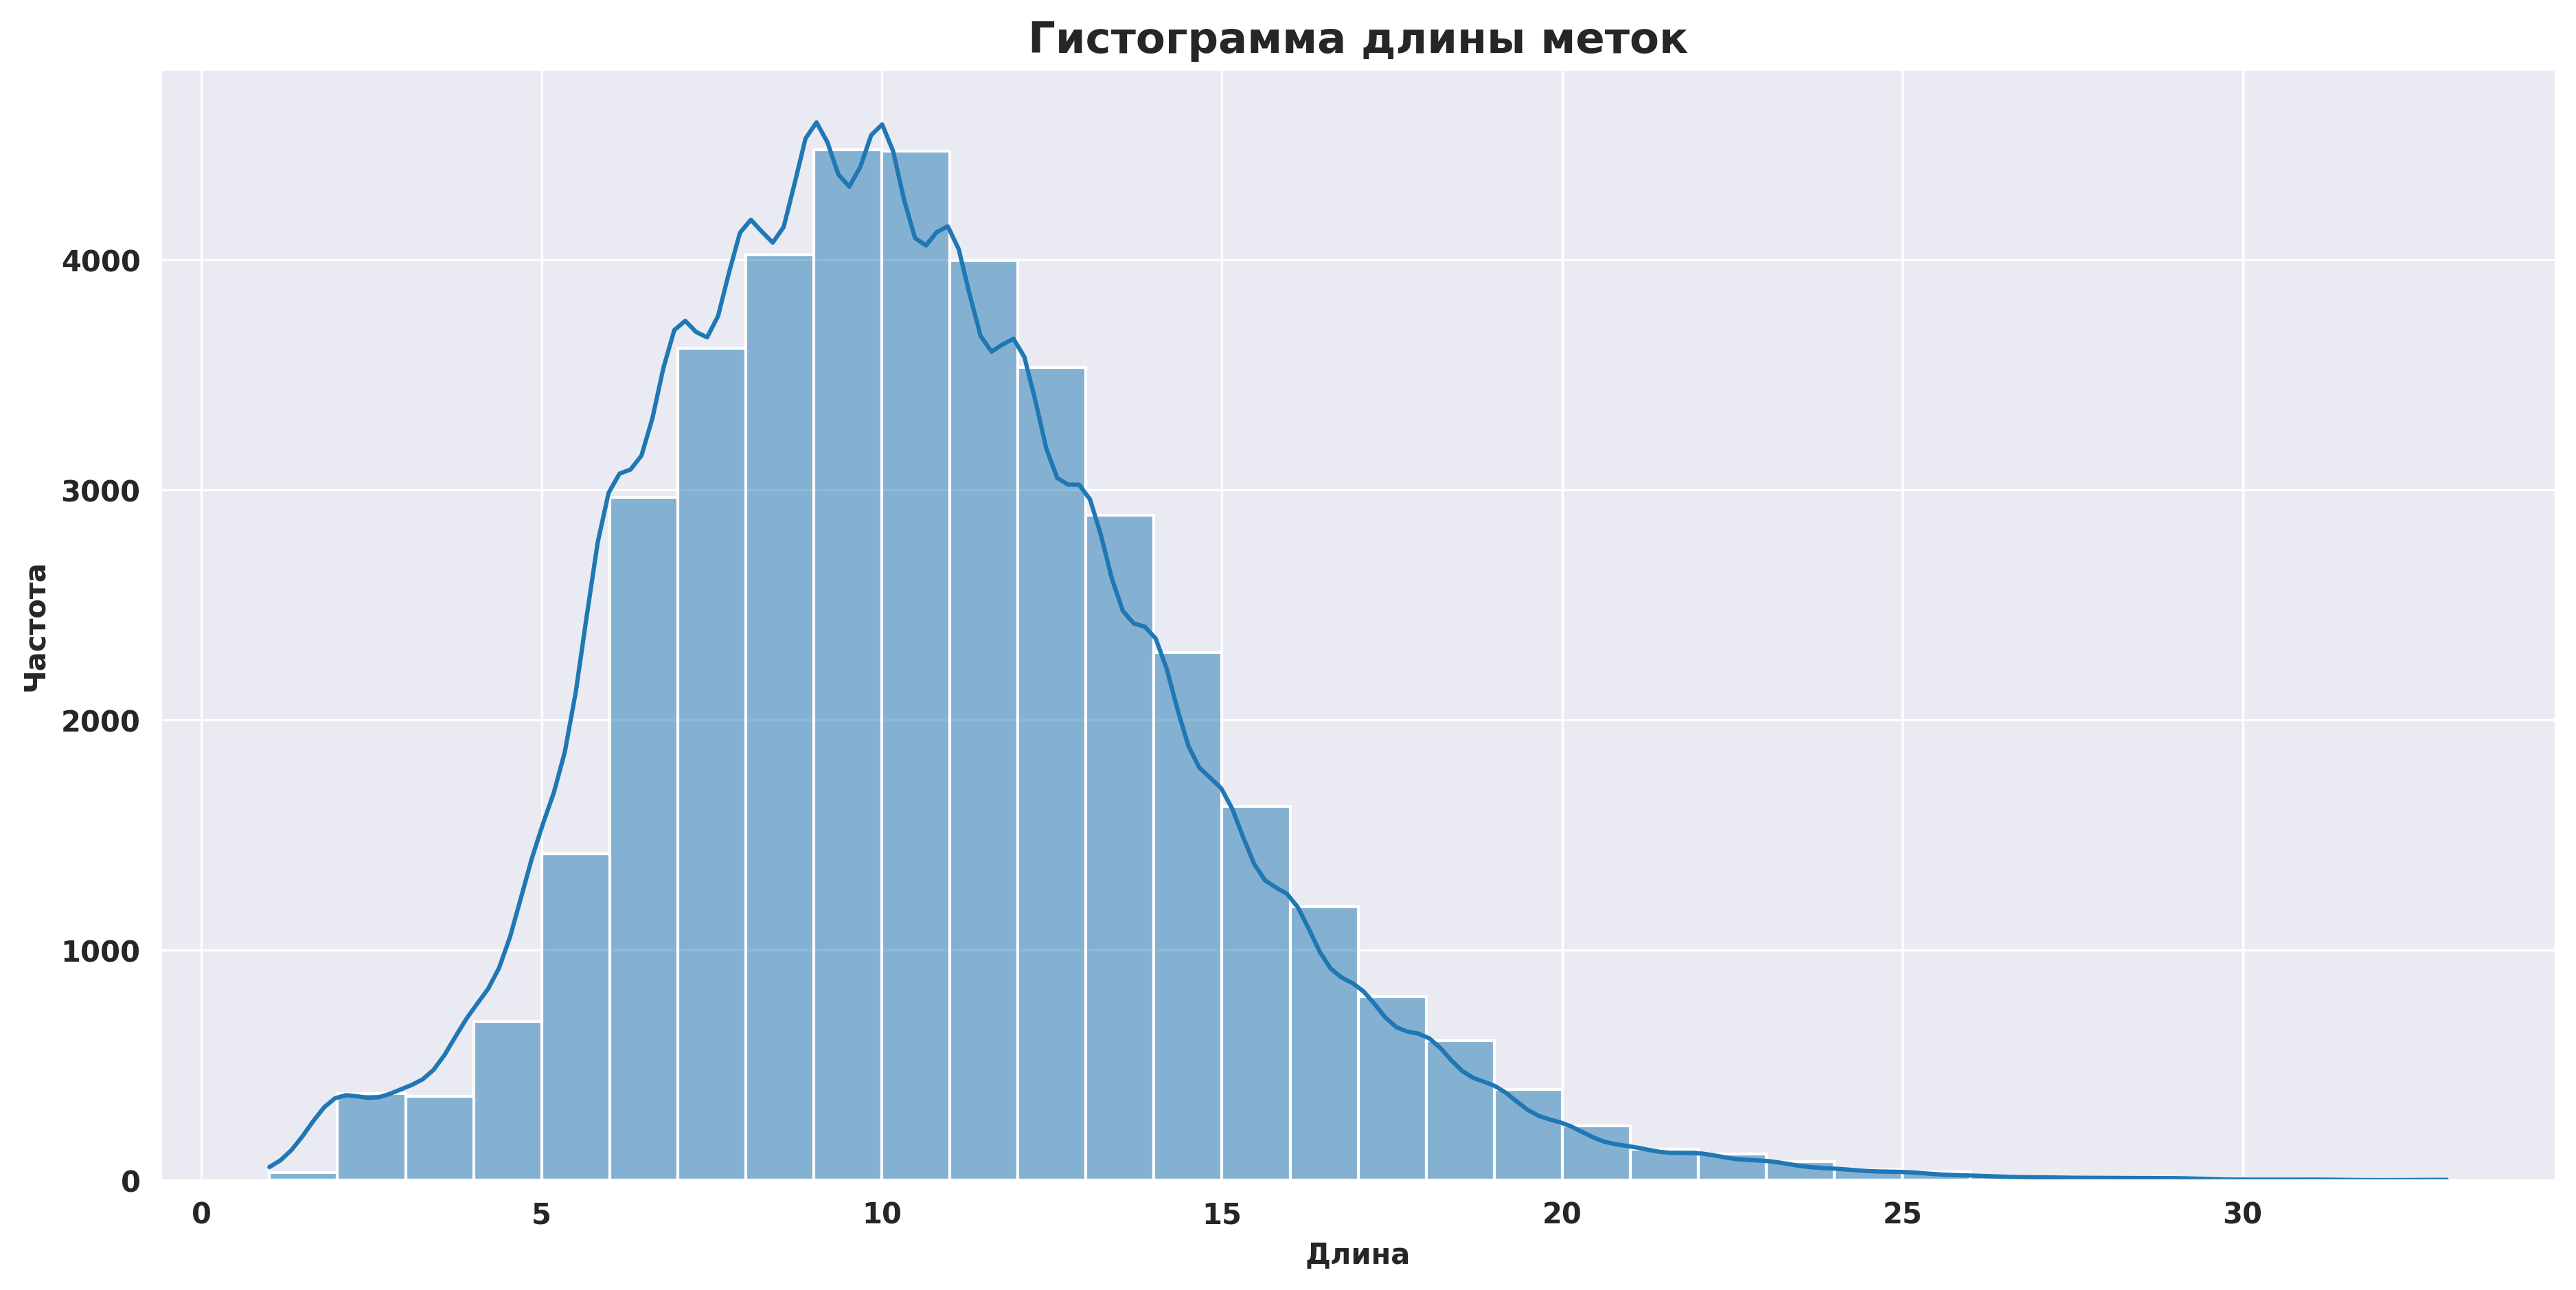

In [ ]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1)
    plt.title('Гистограмма длины меток', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Длина', fontweight='bold')
    plt.ylabel('Частота', fontweight='bold')
    plt.show()

captions_length(cleaned_captions)

In [ ]:
def word_occurrences(data):
    # Объединение всех предложений в одну строку
    all_text = ' '.join(data)
    # Разделение текста на слова и подсчет повторов
    word_counts = Counter(all_text.split())

    words = list(word_counts.keys())[1:30]
    values = list(word_counts.values())[1:30]

    # Нормализация значений
    normalized_values = np.array(values) / np.max(values)
    colors = np.array(['rgba(30, 58, 138, {})'.format(0.4 + 0.5 * (value)) for value in normalized_values])

    fig = go.Figure(data=[go.Pie(labels=words, values=values, hole=.6, marker=dict(colors=colors), textinfo='label')])

    fig.update_layout(title_text='Появление слов в метках (кроме буквы\'a\')', title_font=dict(size=23, family='Balto'))

    fig.show()

word_occurrences(cleaned_captions)

# Токенизация меток и установка размера словаря

In [ ]:
tokenizer = tokenize_captions(cleaned_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8586

# Разделение данных на обучающую, проверочную и тестовую выборки

In [ ]:
# Хранение ID изображений
all_image_ids = os.listdir(images_directory)

# Разделение ID изображений
train_image_ids, val_image_ids = train_test_split(all_image_ids, test_size=0.15, random_state=42)
val_image_ids, test_image_ids = train_test_split(val_image_ids, test_size=0.1, random_state=42)

train_captions, val_captions, test_captions = [], [], []
for caption in captions_IDs:
    image_id, _ = caption.split('\t')

    if image_id in train_image_ids:
        train_captions.append(caption)

    elif image_id in val_image_ids:
        val_captions.append(caption)

    elif image_id in test_image_ids:
        test_captions.append(caption)

    else:
        print('Unknown image ID!')

train_captions[0], val_captions[0], test_captions[0], len(train_captions)/5, len(val_captions)/5, len(test_captions)/5

('1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
 '1001773457_577c3a7d70.jpg\tstart a black dog and a spotted dog are fighting end\n',
 '1042590306_95dea0916c.jpg\tstart a man and woman pose for the camera while another man looks on end\n',
 6877.0,
 1092.0,
 122.0)

# Извлечение признаков изображения с использованием модели InceptionV3

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(299, 299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

def extract_image_features(model, image_path):
    img = preprocess_image(image_path)
    features = model.predict(img, verbose=0)
    return features

# Загрузка предобученной модели InceptionV3
inception_v3_model = InceptionV3(weights = 'imagenet', input_shape=(299, 299, 3))
inception_v3_model.layers.pop()
inception_v3_model = Model(inputs=inception_v3_model.inputs, outputs=inception_v3_model.layers[-2].output)

In [ ]:
train_image_features, val_image_features, test_image_features = {}, {}, {}  # Словарь для хранения признаков изображения с соответствующими идентификаторами

pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
    image_id = caption.split('\t')[0]
    image_path = os.path.join(images_directory, image_id)
    image_features = extract_image_features(inception_v3_model, image_path) # Извлечение признаков

    if image_id in train_image_ids:
        train_image_features[image_id] = image_features.flatten()  # Сглаживание признаков
        pbar.update(1)

    elif image_id in val_image_ids:
        val_image_features[image_id] = image_features.flatten()  # Сглаживание признаков
        pbar.update(1)

    elif image_id in test_image_ids:
        test_image_features[image_id] = image_features.flatten()  # Сглаживание признаков
        pbar.update(1)

    else:
        print('Unknown image ID!')

pbar.close()

# Подготовка данных для ввода модели


Используем генераторы для сбора данных, чтобы оптимизировать использование памяти

In [ ]:
def data_generator(captions, image_features, tokenizer, max_caption_length, batch_size):
    num_samples = len(captions)
    image_ids = list(image_features.keys())

    while True:
        # Перемешиваем данные для каждой эпохи
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for start_idx in range(0, num_samples, batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]
            X_images, X_captions, y = [], [], []

            for idx in batch_indices:
                image_id, caption_text = captions[idx].split('\t')
                caption_text = caption_text.rstrip('\n')

                # Токенизация и создание последовательностей
                seq = tokenizer.texts_to_sequences([caption_text])[0]

                # Создание обучающих пар (X, y)
                for i in range(1, len(seq)):
                    in_seq = seq[:i]
                    out_seq = seq[i]

                    # Паддинг и one-hot кодирование
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X_images.append(image_features[image_id])
                    X_captions.append(in_seq)
                    y.append(out_seq)

            # Преобразуем в numpy массивы правильной формы
            X_images_arr = np.array(X_images)
            X_captions_arr = np.array(X_captions)
            y_arr = np.array(y)

            yield (X_images_arr, X_captions_arr), y_arr

In [ ]:
# Определение максимальной длины меток
max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

# Определение выходного измерения CNN (размер вектора признаков от InceptionV3)
cnn_output_dim = inception_v3_model.output_shape[1] # 2048

# Определение размеров батчей
batch_size_train = 270
batch_size_val = 150

# Создание генераторов данных для обучения и проверки
train_data_generator = data_generator(train_captions, train_image_features, tokenizer, max_caption_length, batch_size_train)
val_data_generator = data_generator(val_captions, val_image_features, tokenizer, max_caption_length, batch_size_val)

In [ ]:
# Проверка размеров
sample_batch = next(train_data_generator)
print("Training sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)
print('=========================')
sample_batch = next(val_data_generator)
print("Validation sample batch shapes:")
print("X_images:", sample_batch[0][0].shape)
print("X_captions:", sample_batch[0][1].shape)
print("y:", sample_batch[1].shape)

Training sample batch shapes:
X_images: (2960, 2048)
X_captions: (2960, 34)
y: (2960, 8586)
Validation sample batch shapes:
X_images: (1698, 2048)
X_captions: (1698, 34)
y: (1698, 8586)


# Архитектура модели


### **Encoder** (признаки изображения)
* Input Layer
* Batch Normalization Layer
* Dense Layer
* Batch Normalization Layer

### **Decoder** (метки)
* Input Layer
* Embedding Layer
* LSTM Layer

### **Output**
* Add Layer (Encoder output + Decoder output)
* Dense Layer + ReLU activation function
* Dense Layer + Softmax activation function

In [ ]:
def build_model(vocab_size, max_caption_length, cnn_output_dim):
    # Encoder Model
    input_image = Input(shape=(cnn_output_dim,), name='Features_Input')
    fe1 = BatchNormalization()(input_image)
    fe2 = Dense(256, activation='relu')(fe1) # Добавление слоя Dense к выходу CNN для соответствия размеру выхода декодера
    fe3 = BatchNormalization()(fe2)

    # Decoder Model
    input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')
    se1 = Embedding(vocab_size, 256, mask_zero=True)(input_caption)
    se2 = LSTM(256)(se1)

    # Output
    decoder1 = add([fe3, se2])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)

    # Returning The Model
    model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
    return model

caption_model = build_model(vocab_size, max_caption_length, cnn_output_dim)

optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
caption_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

caption_model.summary()

Model: "Image_Captioning"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Features_Input      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ Features_Input[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sequence_Input      │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 34, 256)   │  2,198,016 │ Sequence_Input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 34)        │          0 │ Sequence_Input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 256)       │    525,312 │ embedding_1[0][0… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256)       │          0 │ batch_normalizat… │
│                     │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 8586)      │  2,206,602 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,529,482 (21.09 MB)

 Trainable params: 5,524,874 (21.08 MB)

 Non-trainable params: 4,608 (18.00 KB)

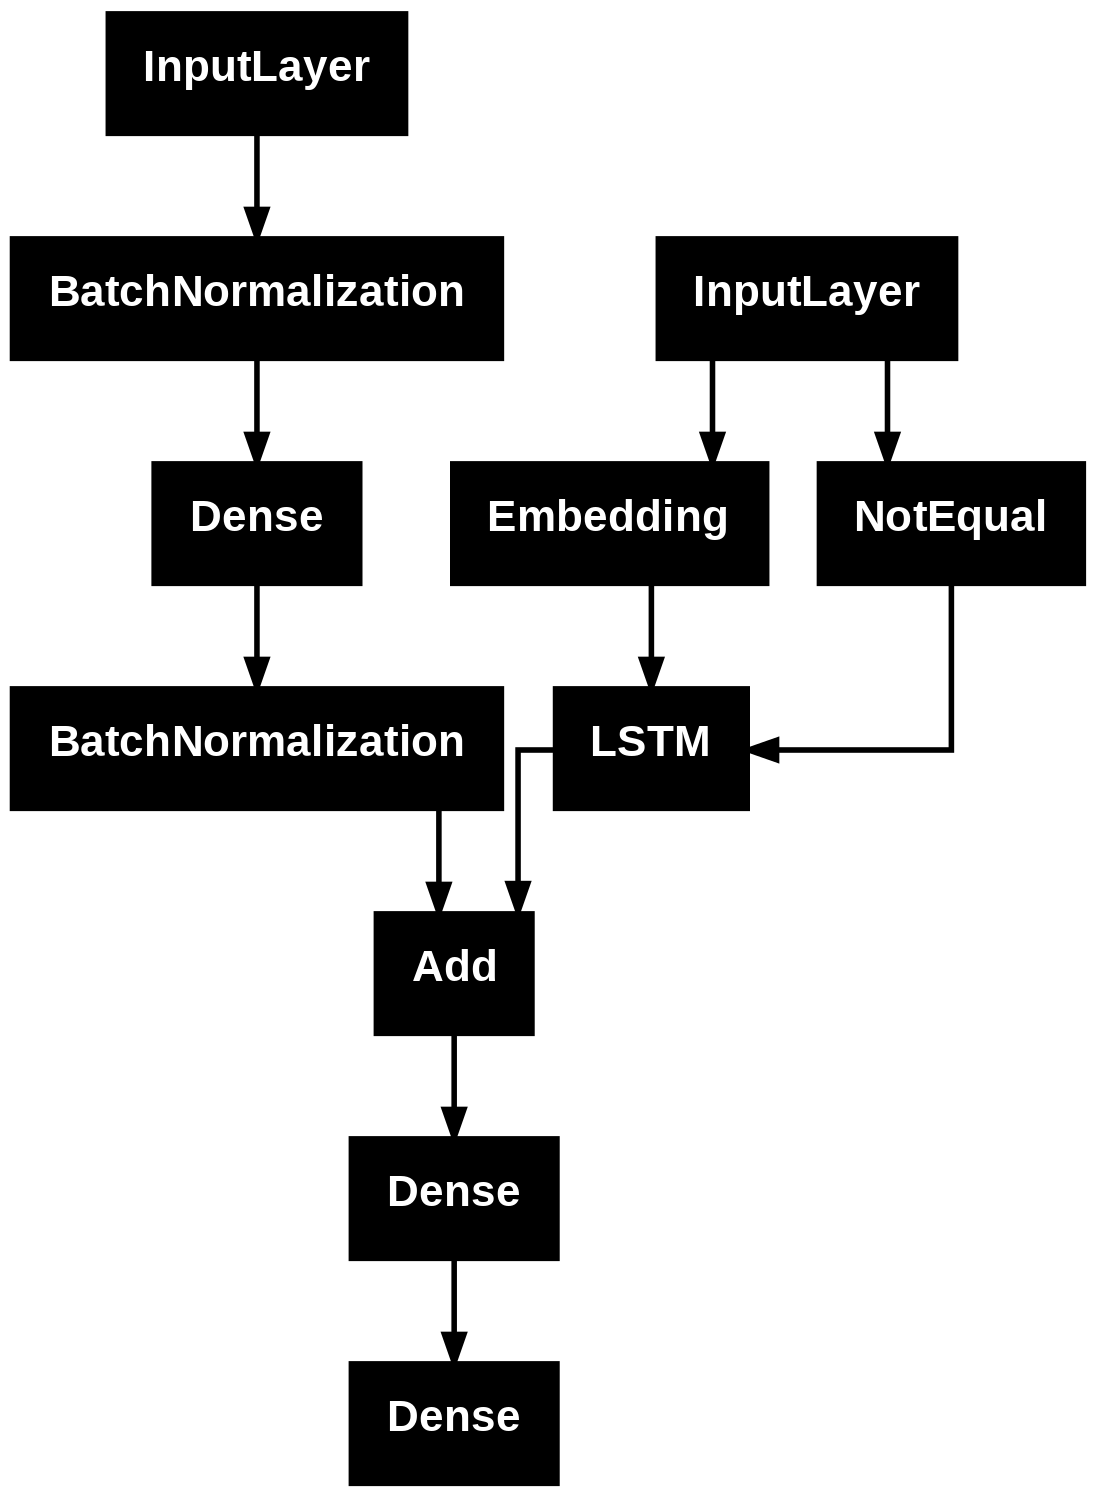

In [ ]:
plot_model(caption_model)

# Обучение модели


Обучение прекращается, если нет улучшения в потере при валидации в течение 3 последовательных эпох.

In [ ]:
# Определение коллбэка ранней остановки для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.6))

# Планировщик скорости обучения
lr_schedule = LearningRateScheduler(lr_scheduler)

history = caption_model.fit(train_data_generator, steps_per_epoch=len(train_captions) // batch_size_train,
                        validation_data=val_data_generator, validation_steps=len(val_captions) // batch_size_val,
                        epochs=15, callbacks=[early_stopping, lr_schedule])

Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 963s 8s/step - loss: 4.9907 - val_loss: 3.5207 - learning_rate: 0.0055
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 882s 7s/step - loss: 3.0045 - val_loss: 3.2136 - learning_rate: 0.0030
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 861s 7s/step - loss: 2.5561 - val_loss: 3.1746 - learning_rate: 0.0017
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 861s 7s/step - loss: 2.3121 - val_loss: 3.2034 - learning_rate: 9.0718e-04
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 860s 7s/step - loss: 2.1485 - val_loss: 3.2143 - learning_rate: 4.9787e-04
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 803s 6s/step - loss: 2.0688 - val_loss: 3.2685 - learning_rate: 2.7324e-04


# Визуализация результатов обучения

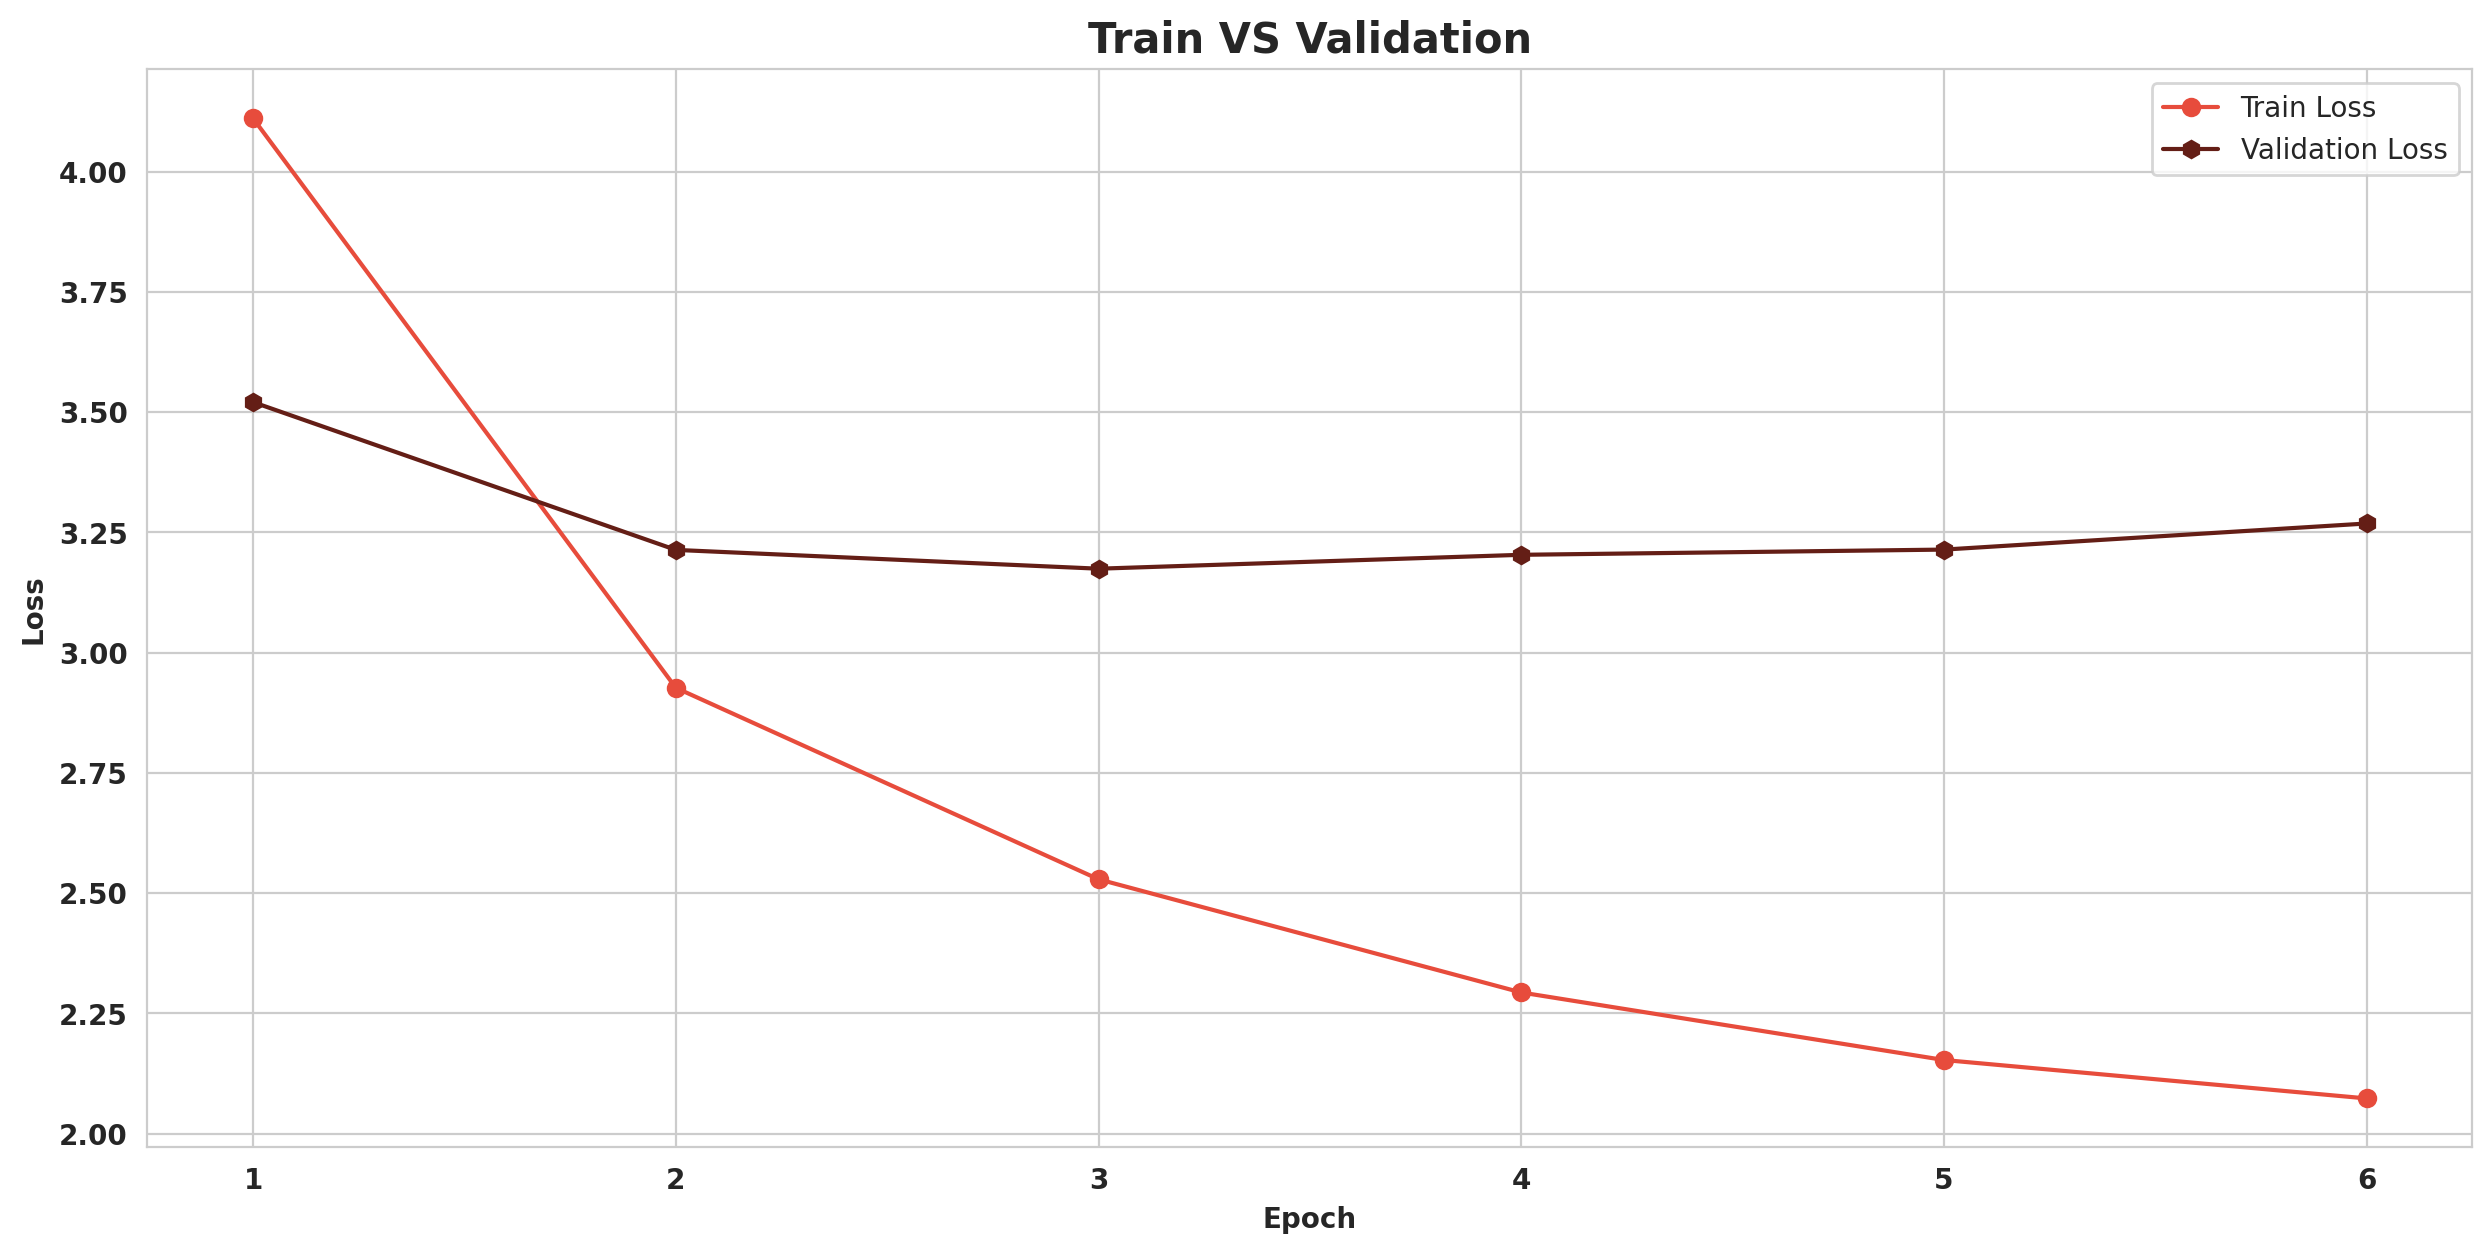

In [ ]:
plt.figure(figsize=(15, 7), dpi=200)
sns.set_style('whitegrid')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['loss'], color='#E74C3C', marker='o')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['val_loss'], color='#641E16', marker='h')
plt.title('Train VS Validation', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

# Инференс


* Caption Generation: на каждом временном шаге модель принимает на вход признаки изображения вместе с сгенерированными подписями (начиная с начала на первом временном шаге), предсказывая вероятности следующего слова.

* Greedy algorithm: используется для выбора лучшей подписи. Этот метод выбирает наиболее вероятное слово на каждом временном шаге и применяет его к сгенерированным меткам пока выбранное слово не станет 'end', или длина декодированных vtnjr не превысит максимальную длину последовательности.

* Beam Search: это альтернатива Greedy algorithm для выбора меток. Он содержит пучок многочисленных гипотез (кандидатов на метки) на каждом временном шаге. На каждом шаге модель предсказывает следующее слово для каждой гипотезы. Кандидаты, занимающие верхние позиции в списке k (на основе вероятностей), сохраняются в пучке. Процесс продолжается до тех пор, пока не будет сгенерирован 'end' или не будет достигнута максимальная длина последовательности.

* Visualization: Функция visualization() отображает изображения вместе с соответствующими предсказанными подписями, сопровождаемыми 2 баллами BLEU.

Оценка производится с помощью BLEU_score. BLEU - это алгоритм для оценки качества текста, который переведенного с одного естественного языка на другой. Алгоритм BLEU сравнивает последовательные фразы автоматического перевода с последовательными фразами, которые он находит в эталонном переводе, и взвешенно подсчитывает количество совпадений. Эти совпадения не зависят от позиции. Высшая степень совпадения указывает на более высокую степень сходства с эталонным переводом и более высокий балл. Внятность и грамматика не учитываются.

In [ ]:
def greedy_generator(image_features): # Функция для создания подписей
    # Каждая подпись начинается со слова 'start'.
    in_text = 'start '
    for _ in range(max_caption_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_caption_length).reshape((1,max_caption_length))
        prediction = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)
        idx = np.argmax(prediction)
        word = tokenizer.index_word[idx]
        # Добавление предсказанного слова к последовательности
        in_text += ' ' + word
        # Когда модель возвращает слово 'end', цикл генерации останавливается
        if word == 'end':
            break

    in_text = in_text.replace('start ', '')
    in_text = in_text.replace(' end', '')

    return in_text

In [ ]:
def beam_search_generator(image_features, K_beams = 3, log = False):
    start = [tokenizer.word_index['start']]

    start_word = [[start, 0.0]]

    for _ in range(max_caption_length):
        temp = []
        for s in start_word:
            # Последовательность наиболее вероятных слов на основе предыдущих шагов
            sequence  = pad_sequences([s[0]], maxlen=max_caption_length).reshape((1,max_caption_length))

            preds = caption_model.predict([image_features.reshape(1,cnn_output_dim), sequence], verbose=0)

            # Сортировка прогнозов по вероятности и отбор последних элементов K_beams
            word_preds = np.argsort(preds[0])[-K_beams:]

            # Получение верхних предсказаний <K_beams>(n) и создание нового списка, чтобы снова пропустить их через модель
            for w in word_preds:

                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                if log:
                    prob += np.log(preds[0][w]) # присвоение вероятности для каждого из K слов
                else:
                    prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        # Сортировка по вероятности
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])

        # Получения топа слов
        start_word = start_word[-K_beams:]

    start_word = start_word[-1][0]
    captions_ = [tokenizer.index_word[i] for i in start_word]

    final_caption = []

    for i in captions_:
        if i != 'end':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [ ]:
# Вычисление оценки BLEU
def BLEU_score(actual, greedy, beam_search):
    # Сравнение предсказанных меток с 5 реальными метками
    score_greedy_1 = corpus_bleu(actual, greedy, weights=(0.3, 0.3, 0.3, 0))
    score_greedy_2 = corpus_bleu(actual, greedy, weights=(0.25, 0.25, 0.25, 0.25))
    score_BS_1 = corpus_bleu(actual, beam_search, weights=(0.3, 0.3, 0.3, 0))
    score_BS_2 = corpus_bleu(actual, beam_search, weights=(0.25, 0.25, 0.25, 0.25))

    return [
        (f'BLEU-2 Greedy: {round(score_BS_2, 5)}'),
        (f'BLEU-1 Greedy: {round(score_BS_1, 5)}'),
        (f'Greedy: {greedy[0]}'),
        (f'BLEU-2 Beam Search: {round(score_greedy_2, 5)}'),
        (f'BLEU-1 Beam Search: {round(score_greedy_1, 5)}'),
        (f'Beam Search:  {beam_search[0]}')
    ]

In [ ]:
# Словарь для доступа к фактическим подписям к каждому изображению по его ID
test_actual_captions = {}
for item in test_captions:
    image_id, caption = item.split('\t')
    if image_id not in test_actual_captions:
        test_actual_captions[image_id] = []
    test_actual_captions[image_id].append(caption)

In [ ]:
# Генерация подписей
generated_captions = {}

pbar = tqdm_notebook(total=len(test_image_features), position=0, leave=True, colour='green')
for image_id in test_image_features:
    cap = greedy_generator(test_image_features[image_id])
    generated_captions[image_id] = cap
    pbar.update(1)

pbar.close()

# Визуализация некоторых тестовых изображений с соответствующими сгенерированными подписями

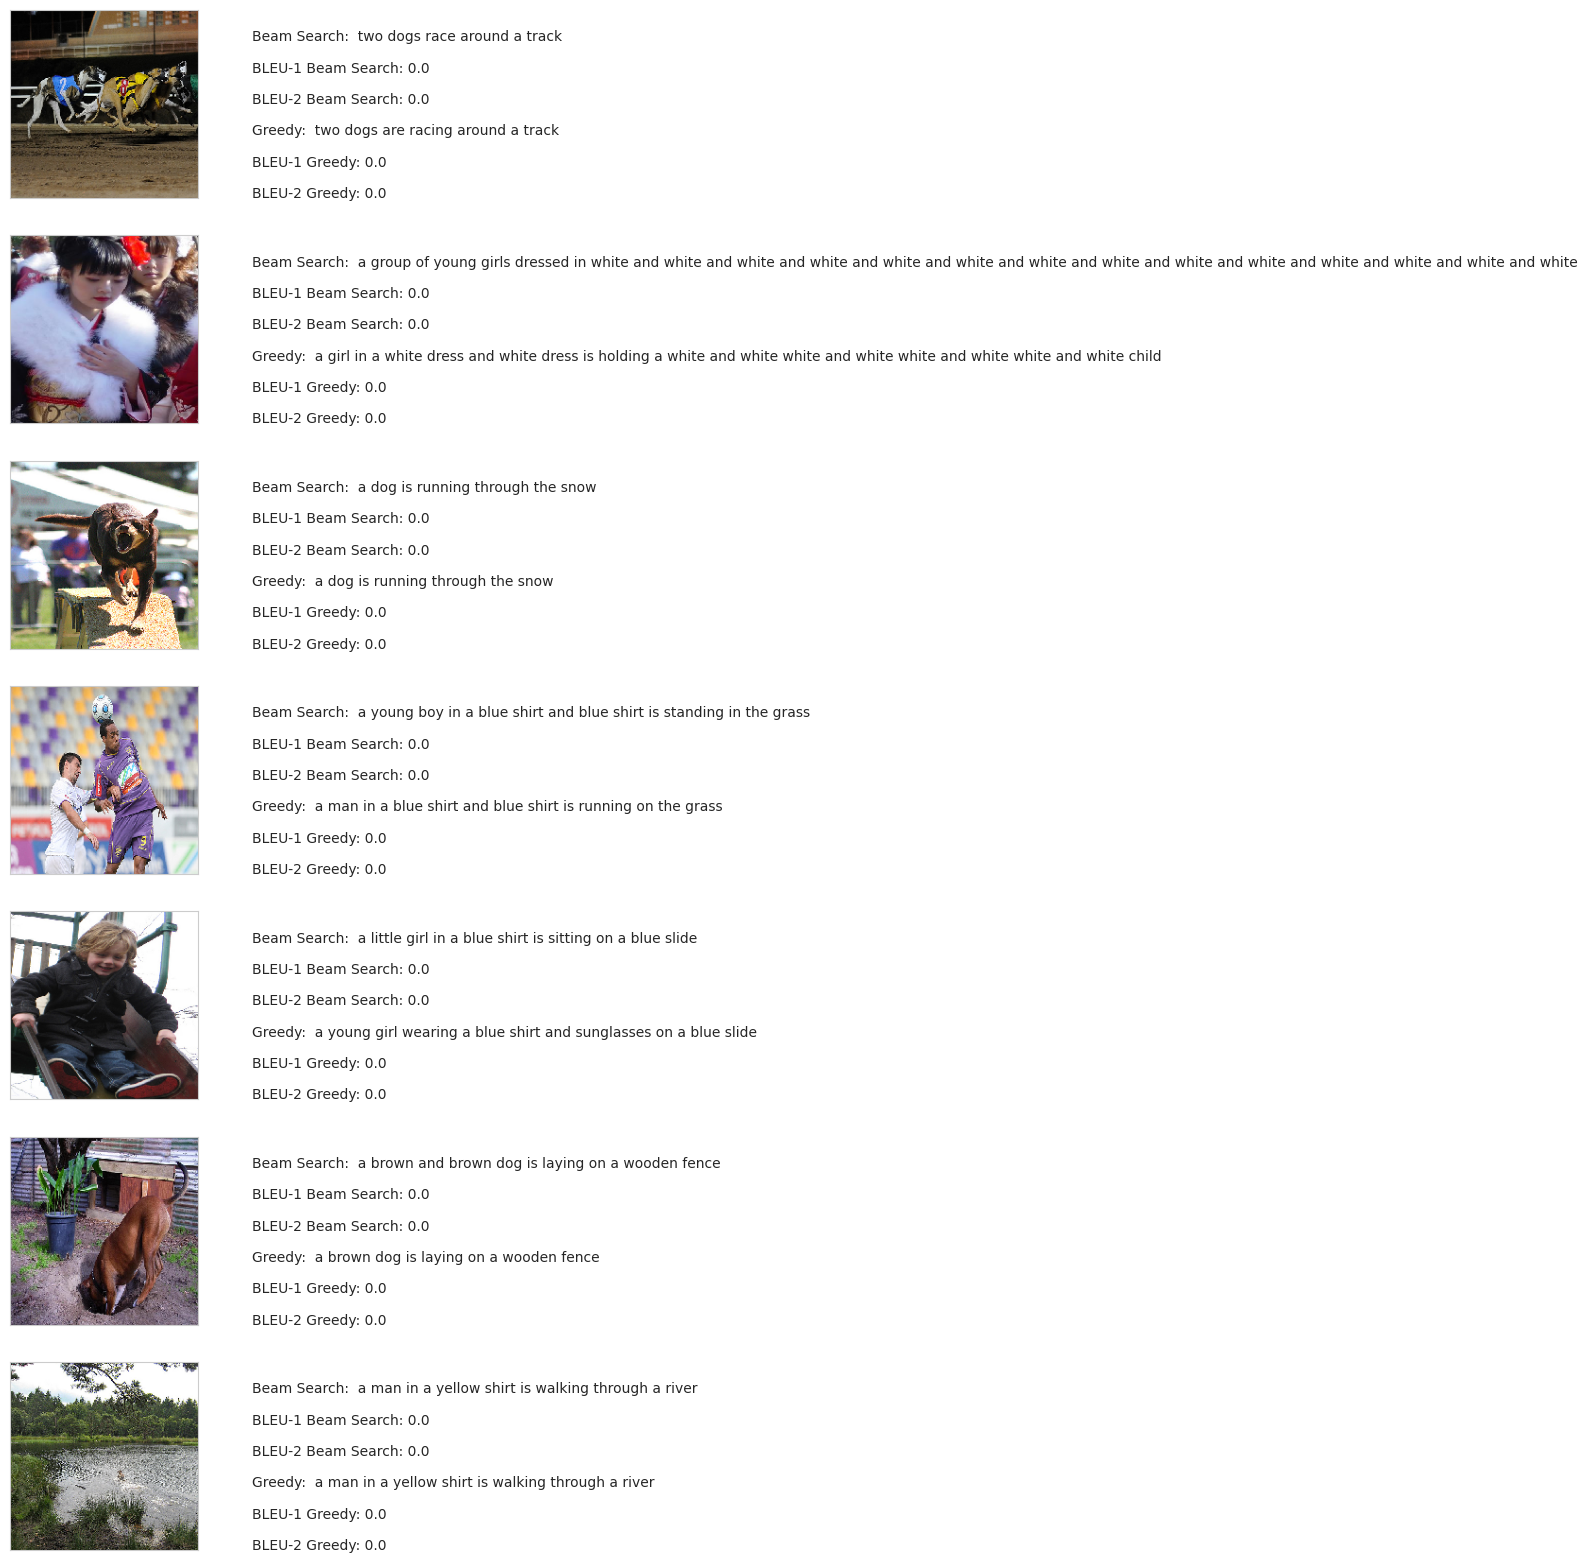

In [ ]:
def visualization_test(data, greedy_caps, beamS_generator, evaluator, num_of_images):
    keys = list(data.keys()) # Список всех тестовых изображений
    images = [np.random.choice(keys) for i in range(num_of_images)] # Случайно выбранные изображения

    count = 1
    fig = plt.figure(figsize=(6,20))
    for filename in images:
        actual_cap = data[filename]
        actual_cap = [x.replace("start ", "") for x in actual_cap] # Удаление токена 'start'
        actual_cap = [x.replace(" end", "") for x in actual_cap] # Удаление токена 'end'

        # Генерация меток
        greedy_cap = greedy_caps[filename]
        beamS_cap = beamS_generator(test_image_features[filename])

        # Получение оценки BLEU
        caps_with_score = evaluator(actual_cap, [greedy_cap]*(len(actual_cap)), [beamS_cap]*(len(actual_cap)))

        image_load = load_img(images_directory+filename, target_size=(199,199,3))
        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(caps_with_score))
        for i, text in enumerate(caps_with_score):
            ax.text(0,i,text,fontsize=10)
        count += 1
    plt.show()

visualization_test(test_actual_captions, generated_captions, beam_search_generator, BLEU_score, 7)

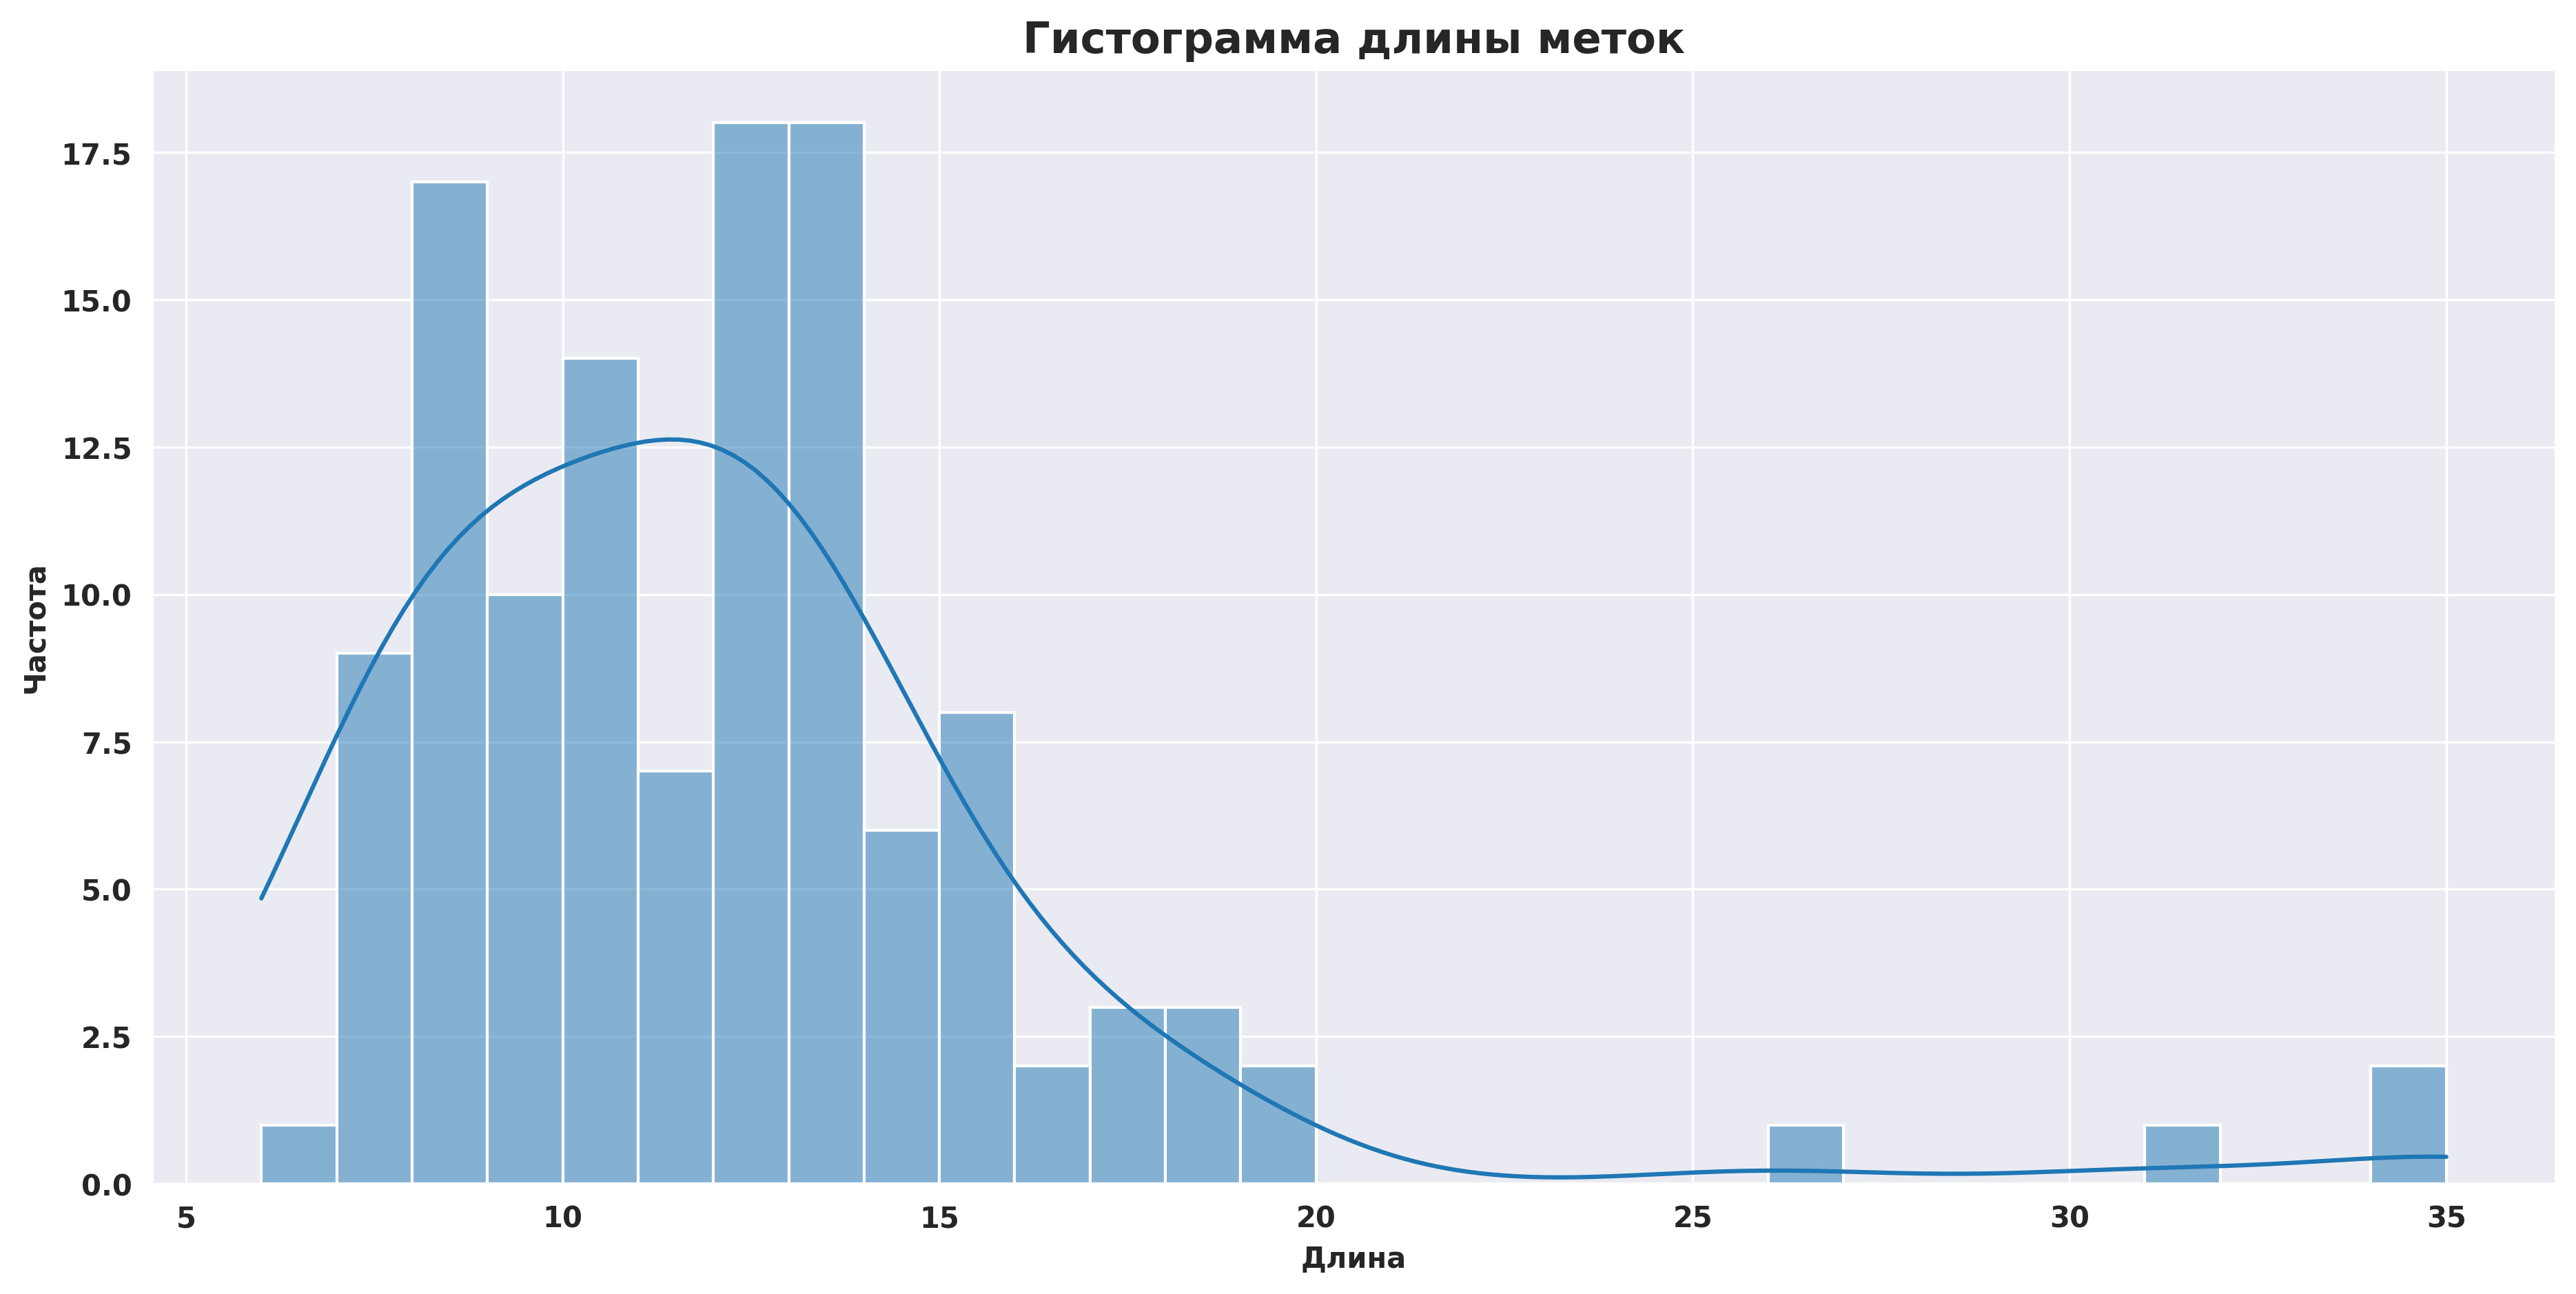

In [ ]:
captions_length(list(generated_captions.values()))

In [ ]:
word_occurrences(list(generated_captions.values()))